# Trends: data exploration

## TODO
- define IS and OOS
- define how to merge both trend and market datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob
from IPython.display import display, HTML, Markdown

## Create trends df from daily information

In [2]:
trends_path = os.path.join('data','daily',"*.csv")
daily_dfs_path =  glob(trends_path)
daily_dfs = [pd.read_csv(path) for path in daily_dfs_path]
daily_dfs_names = [i.split("/")[2] for i in daily_dfs_path]
daily_dfs_names = [i.split(".")[0] for i in daily_dfs_names]

trends_df = []
for name, df in zip(daily_dfs_names, daily_dfs):
    df.index = pd.to_datetime(df.date)
    trends_df.append(df[name])

final_date = "2020-07-25"
trends_df = pd.concat(trends_df,1)
trends_df = trends_df[:final_date]
trends_df = trends_df.fillna(0.0)
trends_df = trends_df / 100
display(Markdown("### Merget trend frequency"))
display(HTML(trends_df.tail().to_html()))
display(Markdown("#### data shape = {}".format(trends_df.shape)))


### Merget trend frequency

,religion,investment,health,committee,invest,rare,war,lifestyle,portfolio,elections,debt,judge,tourism,winsconsin,return,house,market,cash,seats,nasdaq,fine,bonds,pennsylvania,georgia,water,greed,conty,notability,illinois,oil,massachusetts,secretary,kitchen,selling,virginia,restaurant,served,leverage,revenue,earnings,william,politics,governor,car,minister,dow jones,republican,BUY AND HOLD,risk,economics,profit,metals,voter,freedom,justice,stocks,ring,food,crisis,ohio,kentucky,arts,DOW JONES,movement,district,election,hedge,money,gains,forex,consume,votes,markets,present,growth,chance,financial,unemployment,texas,council,crash,labor,color,democratic,environment,holiday,president,earths,happy,nyse,law,police,government,vermount,fun,gold,home,short,party,federal,world,college,rights,fed,credit,movie,success,default,members,finance,cancer,case,travel,returns,consumption,union,stats,political,representatives,bubble,missouri,conflict,loss,train,culture,economy,office,headlines,ore,inflation,legal,garden,derivatives,gain,washington,buy,energy,opportunity,society,security,elected,dividend,housing,transaction,banking,tennessee,carolina,act,trader,york,fond,marriage,court,senate,sell,rich,ministry,stock
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-21,0.01,0.01,0.13,0.0,0.0,0.01,0.03,0.0,0.0,0.0,0.01,0.03,0.0,0.0,0.03,0.19,0.08,0.04,0.01,0.01,0.01,0.0,0.02,0.05,0.16,0.0,0.0,0.0,0.05,0.08,0.02,0.01,0.05,0.01,0.05,0.07,0.0,0.0,0.01,0.01,0.02,0.01,0.02,0.20,0.0,0.04,0.01,0.0,0.01,0.0,0.00,0.0,0.0,0.01,0.01,0.02,0.04,0.18,0.0,0.13,0.02,0.01,0.04,0.01,0.05,0.01,0.0,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.03,0.17,0.16,0.01,0.01,0.02,0.07,0.00,0.0,0.02,0.02,0.0,0.04,0.0,0.05,0.05,0.02,0.0,0.02,0.06,0.31,0.04,0.05,0.05,0.10,0.09,0.01,0.01,0.14,0.16,0.0,0.01,0.01,0.03,0.04,0.06,0.05,0.01,0.0,0.08,0.02,0.01,0.0,0.01,0.04,0.0,0.03,0.02,0.01,0.0,0.14,0.0,0.0,0.0,0.02,0.05,0.0,0.01,0.07,0.14,0.04,0.0,0.02,0.05,0.0,0.0,0.02,0.0,0.01,0.03,0.05,0.03,0.02,0.09,0.0,0.01,0.06,0.01,0.03,0.01,0.0,0.22
2020-07-22,0.01,0.01,0.13,0.0,0.0,0.01,0.03,0.0,0.0,0.0,0.01,0.02,0.0,0.0,0.03,0.19,0.08,0.04,0.01,0.00,0.01,0.0,0.02,0.05,0.16,0.0,0.0,0.0,0.05,0.08,0.02,0.01,0.04,0.01,0.05,0.07,0.0,0.0,0.01,0.02,0.02,0.00,0.02,0.20,0.0,0.04,0.01,0.0,0.01,0.0,0.01,0.0,0.0,0.01,0.01,0.02,0.04,0.18,0.0,0.14,0.02,0.01,0.04,0.01,0.05,0.01,0.0,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.03,0.14,0.16,0.01,0.01,0.02,0.07,0.00,0.0,0.02,0.02,0.0,0.04,0.0,0.05,0.05,0.02,0.0,0.02,0.07,0.31,0.04,0.05,0.05,0.11,0.10,0.01,0.01,0.14,0.16,0.0,0.01,0.01,0.03,0.04,0.05,0.05,0.01,0.0,0.08,0.02,0.01,0.0,0.01,0.03,0.0,0.03,0.02,0.01,0.0,0.12,0.0,0.0,0.0,0.02,0.05,0.0,0.01,0.07,0.14,0.04,0.0,0.02,0.05,0.0,0.0,0.02,0.0,0.01,0.03,0.05,0.03,0.02,0.09,0.0,0.01,0.06,0.01,0.03,0.01,0.0,0.22
2020-07-23,0.01,0.01,0.12,0.0,0.0,0.01,0.03,0.0,0.0,0.0,0.01,0.01,0.0,0.0,0.03,0.19,0.08,0.04,0.01,0.00,0.01,0.0,0.02,0.05,0.16,0.0,0.0,0.0,0.05,0.08,0.02,0.01,0.05,0.01,0.05,0.08,0.0,0.0,0.01,0.01,0.02,0.00,0.02,0.20,0.0,0.04,0.01,0.0,0.01,0.0,0.00,0.0,0.0,0.01,0.01,0.02,0.04,0.19,0.0,0.13,0.02,0.01,0.04,0.01,0.05,0.01,0.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.03,0.13,0.16,0.01,0.01,0.02,0.07,0.00,0.0,0.02,0.02,0.0,0.04,0.0,0.05,0.05,0.02,0.0,0.02,0.06,0.31,0.04,0.05,0.05,0.11,0.09,0.01,0.01,0.14,0.16,0.0,0.01,0.01,0.03,0.04,0.05,0.05,0.01,0.0,0.08,0.02,0.01,0.0,0.01,0.03,0.0,0.03,0.02,0.01,0.0,0.13,0.0,0.0,0.0,0.02,0.05,0.0,0.01,0.10,0.15,0.04,0.0,0.02,0.05,0.0,0.0,0.02,0.0,0.01,0.03,0.05,0.03,0.01,0.09,0.0,0.01,0.05,0.01,0.03,0.01,0.0,0.21
2020-07-24,0.01,0.01,0.11,0.0,0.0,0.01,0.03,0.0,0.0,0.0,0.01,0.01,0.0,0.0,0.03,0.19,0.08,0.04,0.01,0.00,0.01,0.0,0.02,0.05,0.16,0.0,0.0,0.0,0.05,0.08,0.02,0.01,0.05,0.01,0.05,0.09,0.0,0.0,0.01,0.01,0.02,0.01,0.02,0.20,0.0,0.04,0.01,0.0,0.01,0.0,0.00,0.0,0.0,0.01,0.02,0.01,0.04,0.20,0.0,0.12,0.02,0.01,0.04,0.01,0.04,0.01,0.0,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0

#### data shape = (3859, 158)

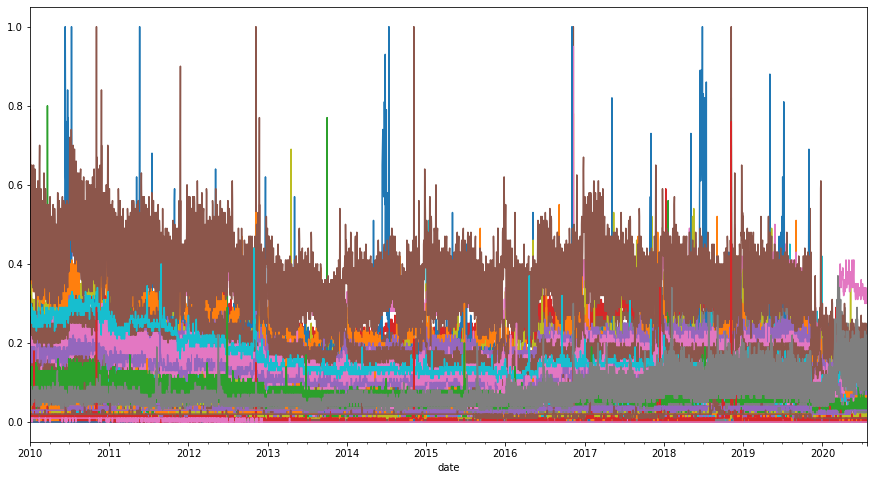

In [3]:
fig, ax = plt.subplots(figsize=(15,8))
trends_df.plot(ax=ax,legend=False);

## Word Signal

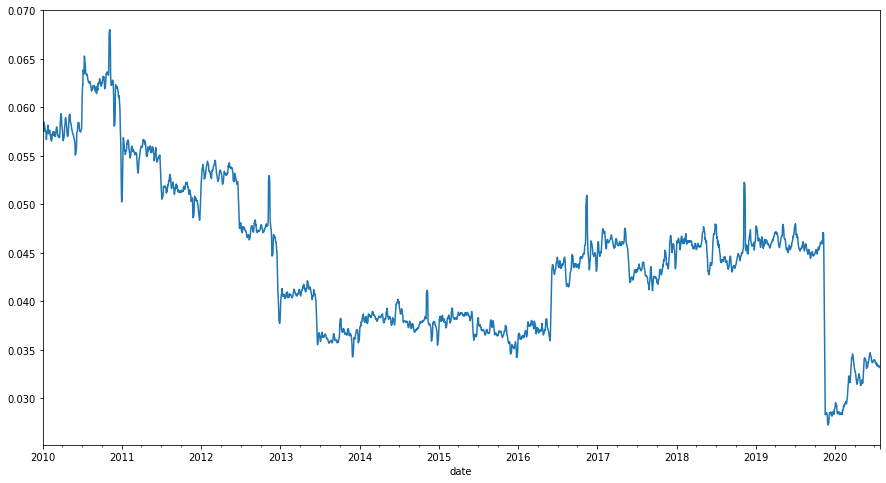

In [4]:
display(Markdown("## Word Signal"))
fig, ax = plt.subplots(figsize=(15,8))
trends_df.mean(1).rolling(7).mean().plot(ax=ax,legend=False);

In [5]:
asset = 'es1'
path = 'data/{}.txt'.format(asset)
market_df = pd.read_csv(path, sep='\t')
price_column = 'PX_LAST'

In [6]:
market_df

,date,FUT_CUR_GEN_TICKER,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_SETTLE,PX_VOLUME,OPEN_INT
0,2000-01-01,.NA.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-02,.NA.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-03,ESH00,1546.27,1553.54,1508.11,1523.17,1523.17,61938.0,13954.0
3,2000-01-04,ESH00,1523.43,1525.24,1463.72,1466.05,1466.05,64048.0,12993.0
4,2000-01-05,ESH00,1465.79,1482.15,1438.27,1467.87,1467.87,73121.0,13855.0
...,...,...,...,...,...,...,...,...,...
7492,2020-07-06,ESU0,3121.25,3174.50,3121.25,3172.00,3172.00,1459512.0,2576791.0
7493,2020-07-07,ESU0,3170.00,3184.00,3132.50,3136.50,3136.50,1333466.0,2568944.0
7494,2020-07-08,ESU0,3135.25,3166.25,3125.50,3163.50,3163.50,1527612.0,2561441.0
7495,2020-07-09,ESU0,3166.25,3170.75,3105.25,3141.00,3141.00,1881833.0,2577231.0
